## Project : Propensify
#### Submitted by: Gayathri Keerthivasagam
### Problem Statement :
Are you aware of what, when, and why your customers will make a purchase? 

Many businesses undertake an intense pursuit to discover these answers, dedicating valuable resources to data-driven campaigns and high-cost strategies - yet the actual outcomes often remain elusive and disappointing.

Customer information is considered to be a valuable asset. Propensity modeling is a method that aims to forecast the chance that individuals, leads, and customers will engage in specific actions. 

Suppose you are working for a company as a Data Scientist. Your company is commissioned by an insurance company to develop a tool to optimize their marketing efforts.
This project is aimed at building a propensity model to identify potential customers.

#### Data:
The insurance company has provided with a historical dataset (train.csv). 
The company has also provided with a list of potential customers to whom to market (test.csv). From this list of potential customers, you need to determine yes/no whether you wish to market to them. (Note: Ignore additional columns such as ‘profit’ and ‘id’ ).


### Process overview 
1.Data Collection and Exploration  
2.Data Cleaning and Preprocessing  
3.Feature Engineering and Selection  
4.Dealing with Imbalanced Data  
5.Model Selection  
6.Model Training and Evaluation  
7.Hyperparameter Tuning  
8.Feature Importance

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for preprocessing steps
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#libraries for resampling the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

#libraries for machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#libraries for cross validation,train test split,hyperparameter tuning
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#libraries for performance metrics
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score,RocCurveDisplay, log_loss

#libraries to regulate warnings
import warnings
warnings.filterwarnings("ignore")

## Read the dataset

In [2]:
train_df = pd.read_excel('train.xlsx')

## Understand the data

In [3]:
#show the first 5 rows of the dataset
train_df.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,...,-1.8,93.075,-47.1,1.498,5099.1,999.0,0.0,no,NaN,1.0
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,...,1.4,93.918,-42.7,4.968,5228.1,999.0,0.0,no,NaN,2.0
2,NaN,admin.,single,high.school,no,no,no,telephone,jun,NaN,...,1.4,94.465,-41.8,4.961,5228.1,999.0,0.0,no,NaN,3.0
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,...,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,no,NaN,4.0
4,39.0,blue-collar,single,NaN,unknown,yes,no,cellular,jul,tue,...,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,no,NaN,5.0


In [4]:
#Identify the no.of rows and columns in the dataset
train_df.shape

(8240, 24)

In [5]:
#check for the datatype and basic info. about the features
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8240 entries, 0 to 8239
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         6224 non-null   float64
 1   profession      8238 non-null   object 
 2   marital         8238 non-null   object 
 3   schooling       5832 non-null   object 
 4   default         8238 non-null   object 
 5   housing         8238 non-null   object 
 6   loan            8238 non-null   object 
 7   contact         8238 non-null   object 
 8   month           8238 non-null   object 
 9   day_of_week     7451 non-null   object 
 10  campaign        8238 non-null   float64
 11  pdays           8238 non-null   float64
 12  previous        8238 non-null   float64
 13  poutcome        8238 non-null   object 
 14  emp.var.rate    8238 non-null   float64
 15  cons.price.idx  8238 non-null   float64
 16  cons.conf.idx   8238 non-null   float64
 17  euribor3m       8238 non-null   f

In [6]:
#check for the features in the dataset
train_df.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'responded', 'profit', 'id'],
      dtype='object')

In [7]:
#Generate descriptive statistics for numerical columns in the dataset
train_df.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,profit,id
count,6224.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,930.000000,8238.000000
mean,39.953728,2.531682,960.916606,0.183054,0.056397,93.570977,-40.577907,3.586929,5165.575965,960.687436,0.365501,77.709677,4119.500000
std,10.540516,2.709773,190.695054,0.514209,1.566550,0.578782,4.650101,1.742784,72.727423,191.841012,1.294101,2881.768500,2378.250092
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,-87622.112070,1.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000,124.000000,2060.250000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000,170.000000,4119.500000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000,213.000000,6178.750000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,25.000000,515.000000,8238.000000


In [8]:
#Ignoring the additional columns available other than the columns mentioned in the project description.
#Dropping the 'profit' and 'id' features.
train_df.drop(['profit','id'],axis=1,inplace=True)
#Delete the last two rows as it has only null values
train_df= train_df.iloc[:-2]

In [9]:
#Final shape of the dataset after dropping the additional columns
train_df.shape

(8238, 22)

## Exploratory Data Analysis

#### Analysis of target variable.

In [10]:
#Find the no.of class and its counts in the dataset
train_df.responded.value_counts()

responded
no     7310
yes     928
Name: count, dtype: int64

 There are more number of records for negative response than the positive response.

In [11]:
#Compute the relative frequencies of unique values in the target column.
train_df.responded.value_counts(normalize=True)

responded
no     0.887351
yes    0.112649
Name: proportion, dtype: float64

The target variable is imbalanced. Approx.88% belong to 'no' category and only 11% belong to 'yes' category.

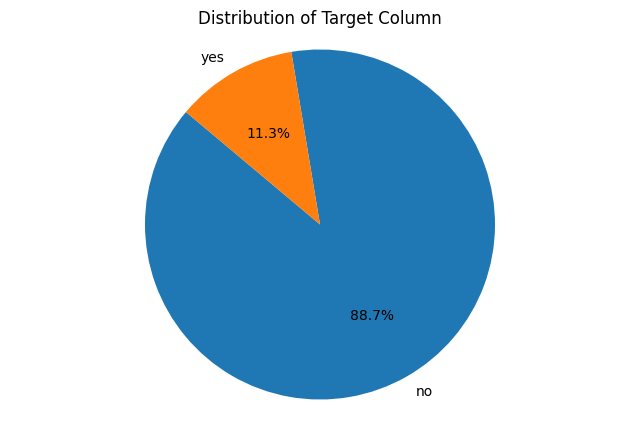

In [12]:
#Plot the target column values and its count.
# Calculate value counts of the target column
responded_counts = train_df['responded'].value_counts()

# Plot pie chart
plt.figure(figsize=(8,5))
plt.pie(responded_counts, labels=responded_counts.index,autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Column')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circ
# Save the plot as PNG file
plt.savefig('Distribution_of_Target_Class.png') 
plt.show()

 There are more records for class 'no' than the class 'yes'.

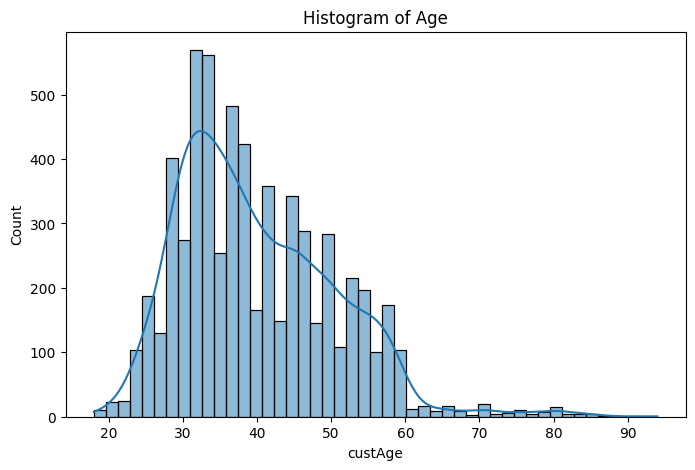

In [13]:
# Plot a histogram with KDE for the 'custAge' column.
plt.figure(figsize=(8,5))
sns.histplot(data = train_df,kde=True,x= 'custAge')
# Save the plot as PNG file
plt.savefig('Histogram_of_Age.png') 
plt.title('Histogram of Age')
plt.show()


The 'custAge' feature varies from 18 to 94. It doesn't follow the normal distribution.

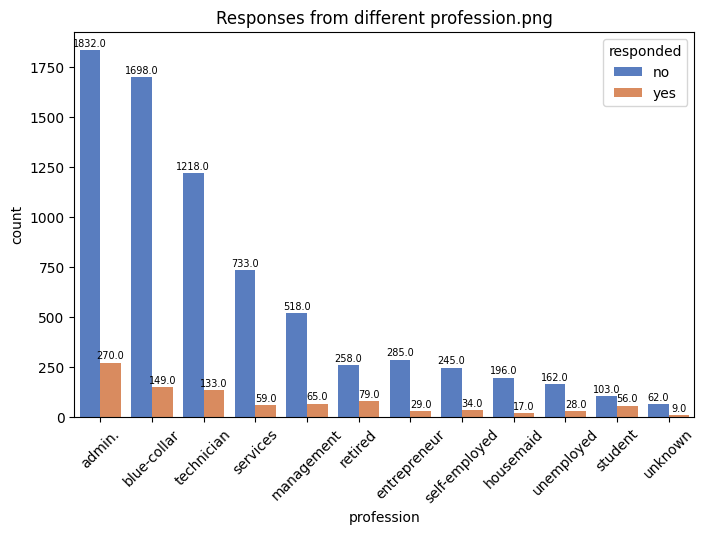

In [14]:
# Plot a countplot for the 'profession' column.
plt.figure(figsize=(8,5))
ax = sns.countplot(data = train_df,x= 'profession',hue='responded',palette='muted',order=train_df['profession'].value_counts().index)
plt.xticks(rotation=45)
# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

# Save the plot as PNG file
plt.savefig('Response_from_different_profession.png')
plt.title('Responses from different profession.png')
plt.show()

The customer with the profession 'admin' has more positive response than other professions.

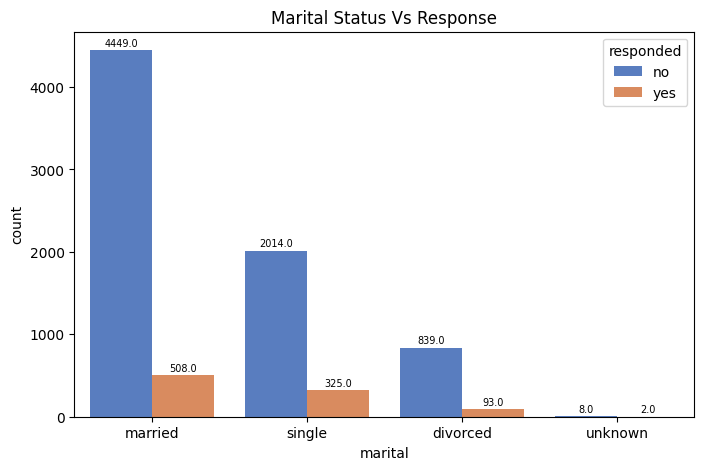

In [15]:
# Plot a countplot for the 'marital' column.
plt.figure(figsize=(8,5))
ax=sns.countplot(data = train_df,x= 'marital',hue='responded',palette='muted',order=train_df['marital'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

# Save the plot as PNG file
plt.savefig('Marital_status_plot.png')
plt.title('Marital Status Vs Response')
plt.show()

The 'married' customers have given more positive response than single or divorced.

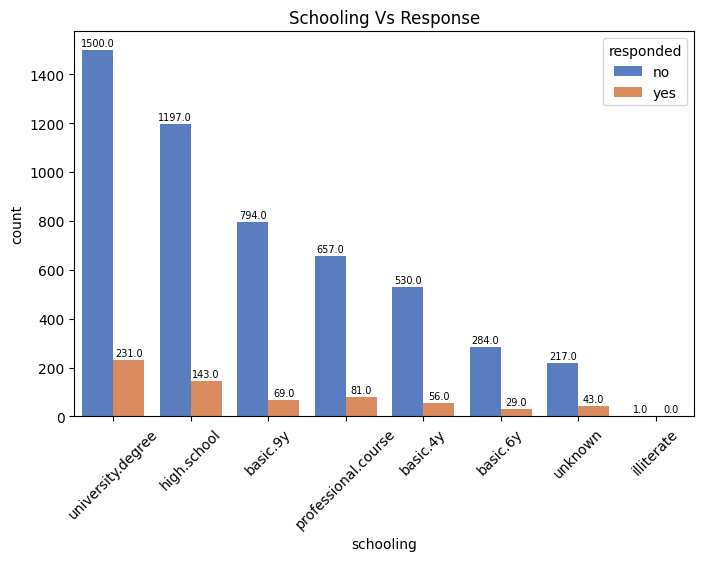

In [16]:
# Plot a countplot for the 'schooling' column.
plt.figure(figsize=(8,5))
ax = sns.countplot(data = train_df,x= 'schooling',hue='responded',palette='muted',order=train_df['schooling'].value_counts().index)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

# Save the plot as PNG file
plt.savefig('Schooling_plot.png')
plt.title('Schooling Vs Response')
plt.show()

The 'university.degree' education level has more number of positive response than other levels.

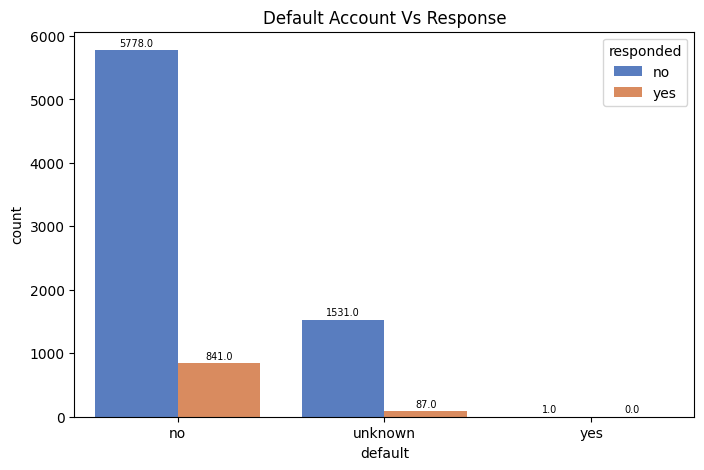

In [17]:
# Plot a countplot for the 'default' column.
plt.figure(figsize=(8,5))
ax=sns.countplot(data = train_df,x= 'default',hue='responded',palette='muted',order=train_df['default'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

# Save the plot as PNG file
plt.savefig('default_account_plot.png')
plt.title('Default Account Vs Response')
plt.show()

More number of positive response from the customers who doesn't have defaulted account.

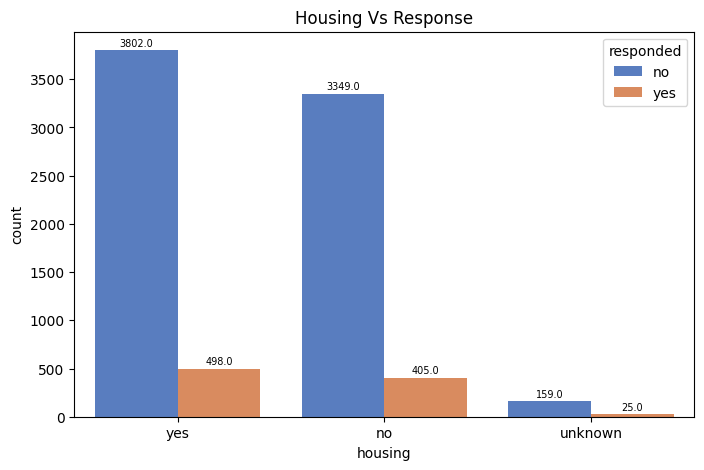

In [18]:
# Plot a countplot for the 'housing' column.
plt.figure(figsize=(8,5))
ax=sns.countplot(data = train_df,x= 'housing',hue='responded',palette='muted',order=train_df['housing'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

# Save the plot as PNG file
plt.savefig('Housing_plot.png')
plt.title('Housing Vs Response')
plt.show()

The parameter of owning house loan has no significant impact on the responses.

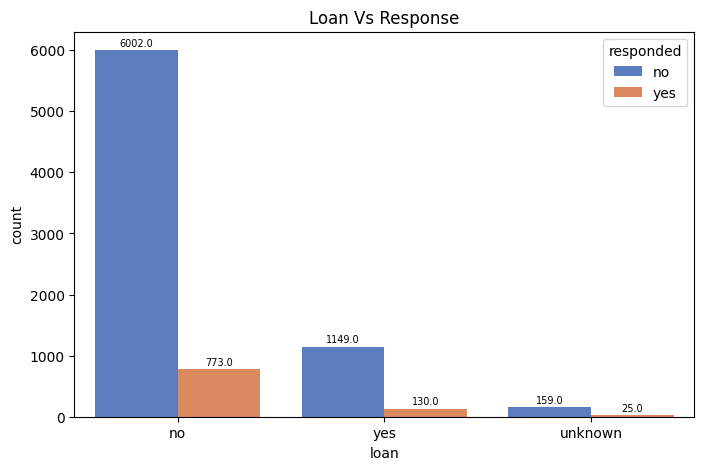

In [19]:
# Plot a countplot for the 'loan' column.
plt.figure(figsize=(8,5))
ax=sns.countplot(data = train_df,x= 'loan',hue='responded',palette='muted',order=train_df['loan'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

# Save the plot as PNG file
plt.savefig('Loan_plot.png')
plt.title('Loan Vs Response')
plt.show()

There is no significant inference that can be derived from the above graph between owning the personal loan and their responses.However there is more number of positive reponses from the customers who doesn't have personal loan.

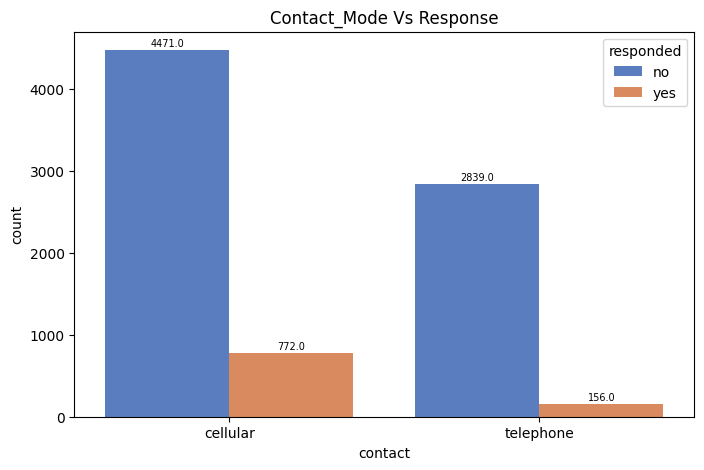

In [20]:
# Plot a countplot for the 'contact' column.
plt.figure(figsize=(8,5))
ax = sns.countplot(data = train_df,x= 'contact',hue='responded',palette='muted',order=train_df['contact'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

# Save the plot as PNG file
plt.savefig('Contact_Mode.png')
plt.title('Contact_Mode Vs Response')
plt.show()

The cellular communication seems to be more effective than the telephone.

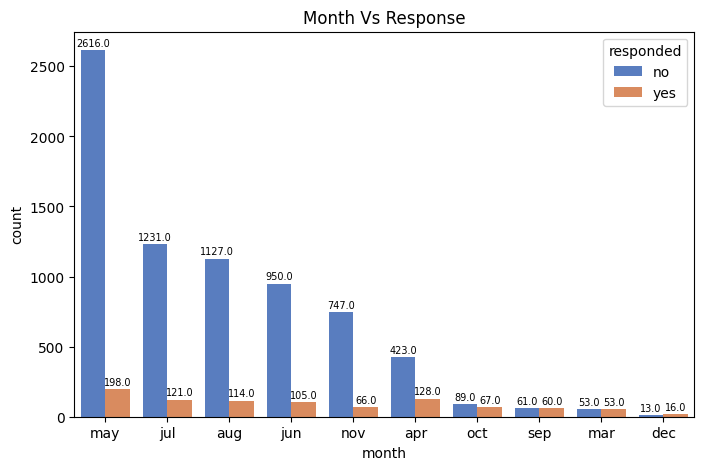

In [21]:
# Plot a countplot for the 'month' column.
plt.figure(figsize=(8,5))
ax = sns.countplot(data = train_df,x= 'month',hue='responded',palette='muted',order=train_df['month'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

# Save the plot as PNG file
plt.savefig('Month_plot.png')
plt.title('Month Vs Response')
plt.show()

The positive responses from the customers remains almost equal in all months. 
However there are no records for January and February months.May month has more number of positive responses.

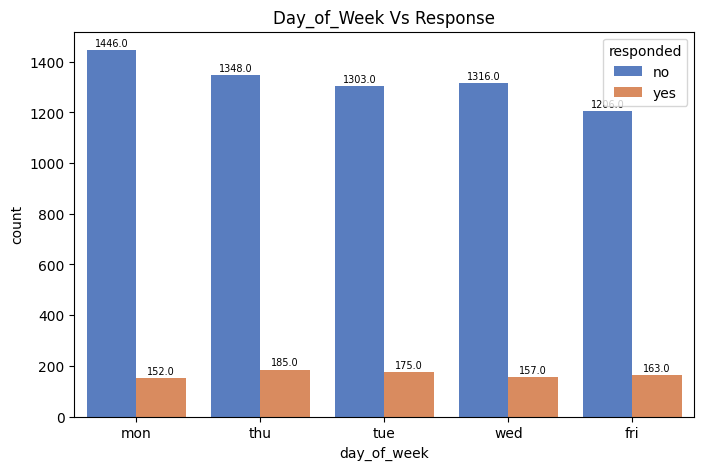

In [22]:
# Plot a countplot for the 'day_of_week' column.
plt.figure(figsize=(8,5))
ax = sns.countplot(data = train_df,x= 'day_of_week',hue='responded',palette='muted',order=train_df['day_of_week'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

# Save the plot as PNG file
plt.savefig('day_of_week_plot.png')
plt.title('Day_of_Week Vs Response')
plt.show()

The positive responses from the customers remains almost equal in all days of the week. 


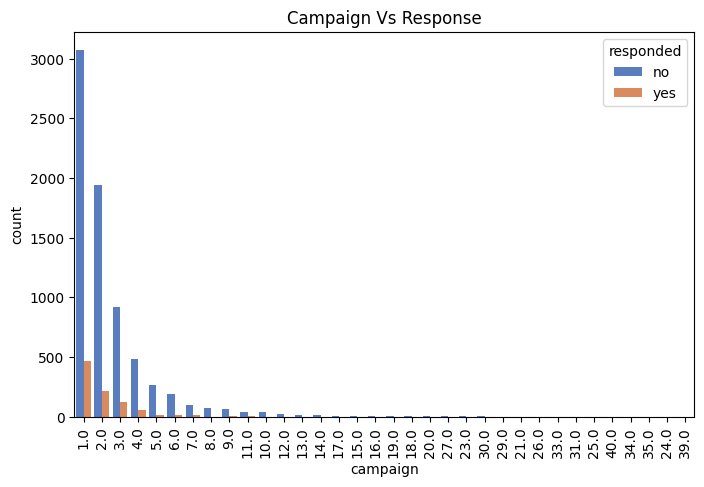

In [23]:
# Plot a countplot for the 'campaign' column.
plt.figure(figsize=(8,5))
sns.countplot(data = train_df,x= 'campaign',hue='responded',palette='muted',order=train_df['campaign'].value_counts().index)

# Save the plot as PNG file
plt.savefig('Campaign_plot.png')
plt.title('Campaign Vs Response')
plt.xticks(rotation=90)
plt.show()

As the number of times the customer contacted increases,the positive responses from the customer decreases.

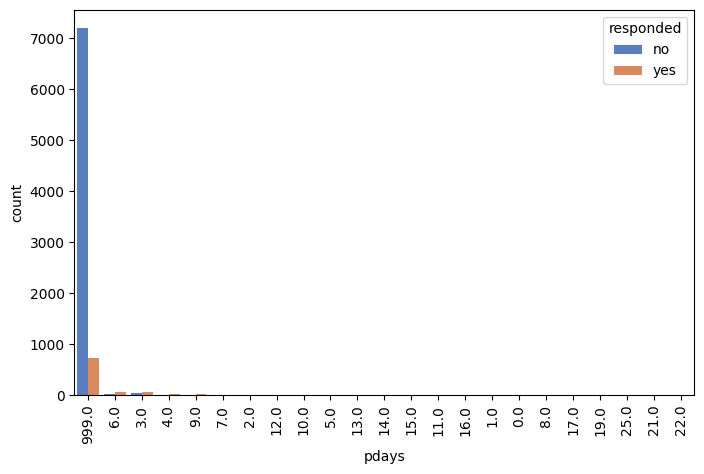

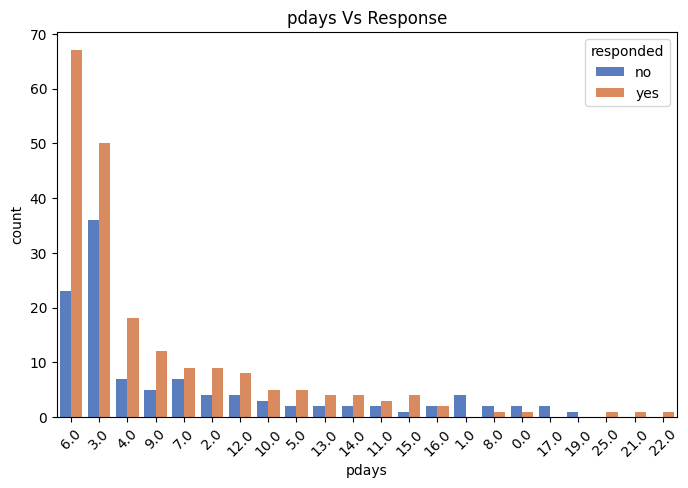

In [24]:
# Plot a countplot for the 'pdays' column.
plt.figure(figsize=(8,5))
sns.countplot(data = train_df,x= 'pdays',hue='responded',palette='muted',order=train_df['pdays'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(8,5))
temp_df = train_df[train_df['pdays']!=999]
sns.countplot(x='pdays',hue = 'responded',data = temp_df,palette='muted',order=temp_df['pdays'].value_counts().index)
plt.xticks(rotation = 45)

# Save the plot as PNG file
plt.savefig('pdays_plot.png')
plt.title('pdays Vs Response')
plt.show()

After ignoring the customers who were not previously contacted,there are more number of 'yes' responses
when the customer is contacted around 6 days after the previous campaign.

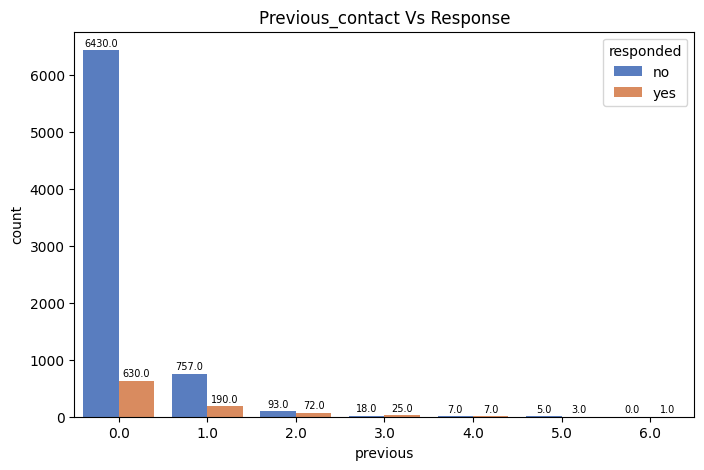

In [25]:
# Plot a countplot for the 'previous' column.
plt.figure(figsize=(8,5))
ax = sns.countplot(data = train_df,x= 'previous',hue='responded',palette='muted')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

# Save the plot as PNG file
plt.savefig('previous_plot.png')
plt.title('Previous_contact Vs Response')
plt.show()

There is no significant relation obtained from the graph between the customer responses and number of previous contacts performed before this campaign.

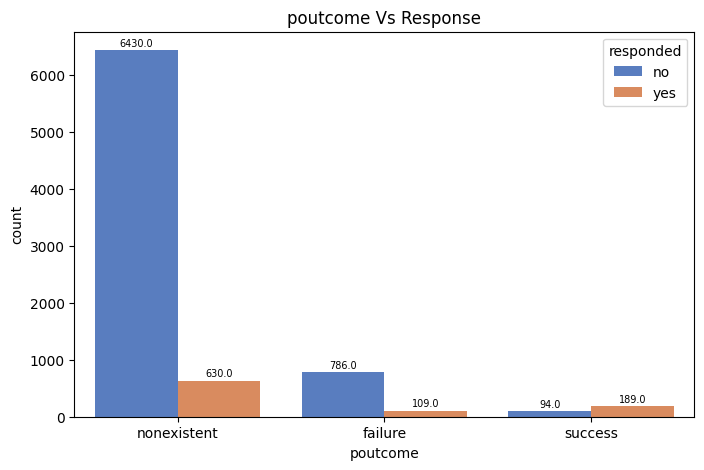

In [26]:
# Plot a countplot for the 'poutcome' column.
plt.figure(figsize=(8,5))
ax=sns.countplot(data = train_df,x= 'poutcome',hue='responded',palette='muted')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

# Save the plot as PNG file
plt.savefig('poutcome_plot.png')
plt.title('poutcome Vs Response')
plt.show()

There is more number of positive responses than negative responses from the customer when the outcome of the previous marketing marketing campaign is 'Success'

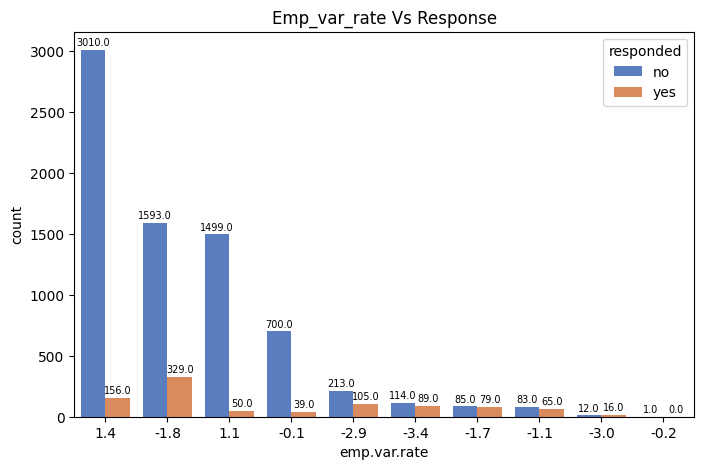

In [27]:
# Plot a countplot for the 'emp.var.rate' column.
plt.figure(figsize=(8,5))
ax=sns.countplot(data = train_df,x= 'emp.var.rate',hue='responded',palette='muted',order=train_df['emp.var.rate'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

# Save the plot as PNG file
plt.savefig('emp_var_rate_plot.png')
plt.title('Emp_var_rate Vs Response')
plt.show()

When the employment variation rate is around -3, there are more positive responses than the negative response from the customers.

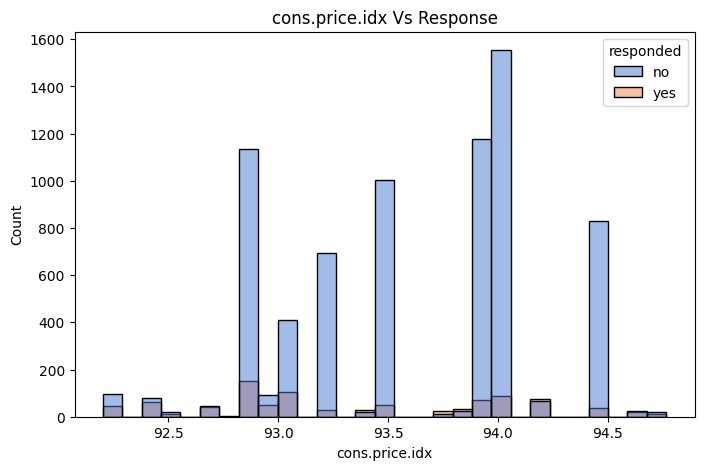

In [28]:
# Plot a countplot for the 'cons.price.idx' column.
plt.figure(figsize=(8,5))
sns.histplot(data = train_df,x= 'cons.price.idx',hue='responded',palette='muted')

# Save the plot as PNG file
plt.savefig('cons_price_idx.png')
plt.title('cons.price.idx Vs Response')
plt.show()

There is no significant inference obatined from the graph between the customer responses and consumer price index.

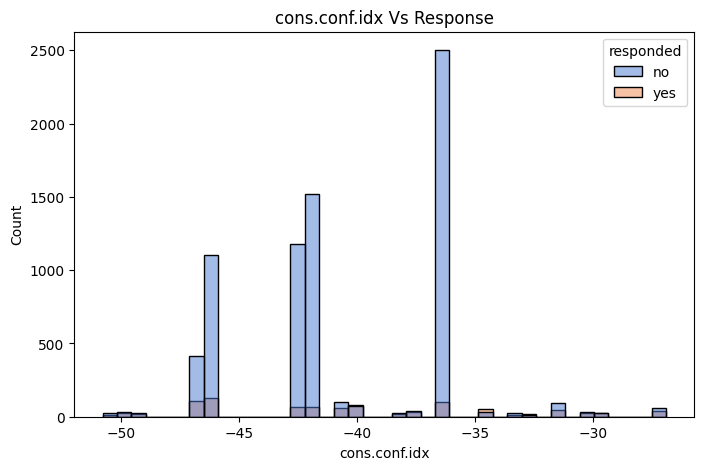

In [29]:
# Plot a countplot for the 'cons.conf.idx' column.
plt.figure(figsize=(8,5))
sns.histplot(data = train_df,x= 'cons.conf.idx',hue='responded',palette='muted')
# Save the plot as PNG file
plt.savefig('cons_conf_idx.png')
plt.title('cons.conf.idx Vs Response')
plt.show()

There is no significant inference obatined from the graph between the customer responses and consumer confidence index.

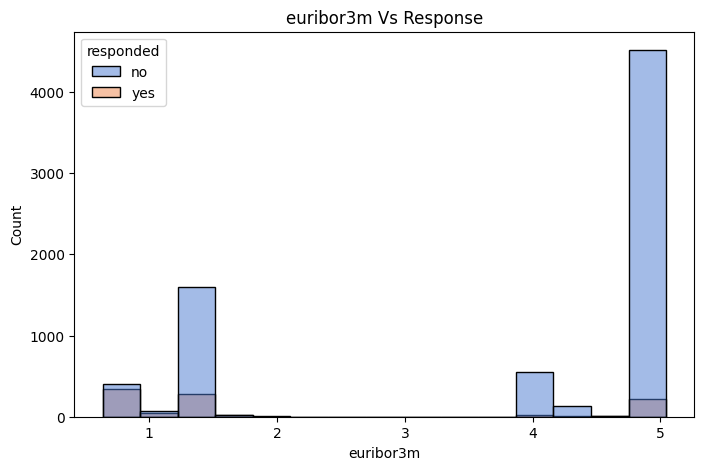

In [30]:
# Plot a histplot for the 'euribor3m' column.
plt.figure(figsize=(8,5))
sns.histplot(data = train_df,x= 'euribor3m',hue='responded',palette='muted')
# Save the plot as PNG file
plt.savefig('euribor3m.png')
plt.title('euribor3m Vs Response')
plt.show()

There is no significant inference obatined from the graph between the customer responses and euribor 3 month rate.

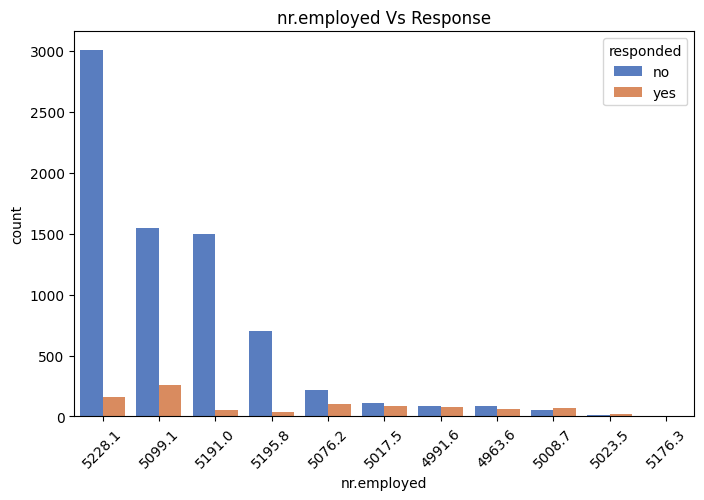

In [31]:
# Plot a countplot for the 'nr.employed' column.
plt.figure(figsize=(8,5))
sns.countplot(data = train_df,x= 'nr.employed',hue='responded',palette='muted',order=train_df['nr.employed'].value_counts().index)
plt.xticks(rotation=45)
# Save the plot as PNG file
plt.savefig('nr_employed.png')
plt.title('nr.employed Vs Response')
plt.show()

There is no significant inference obatined from the graph between the customer responses and number of employees.

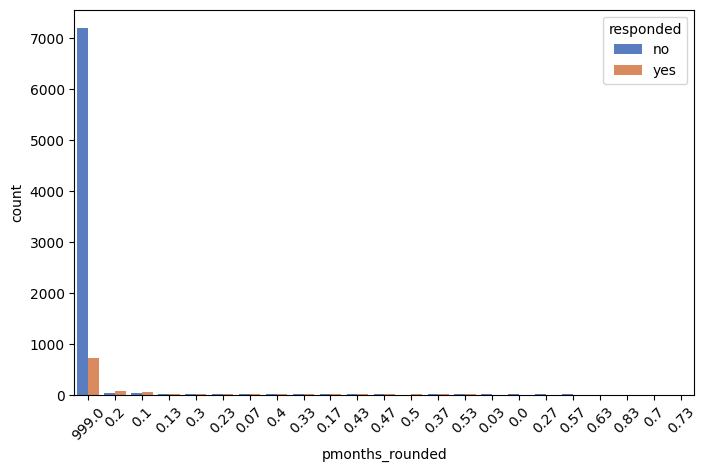

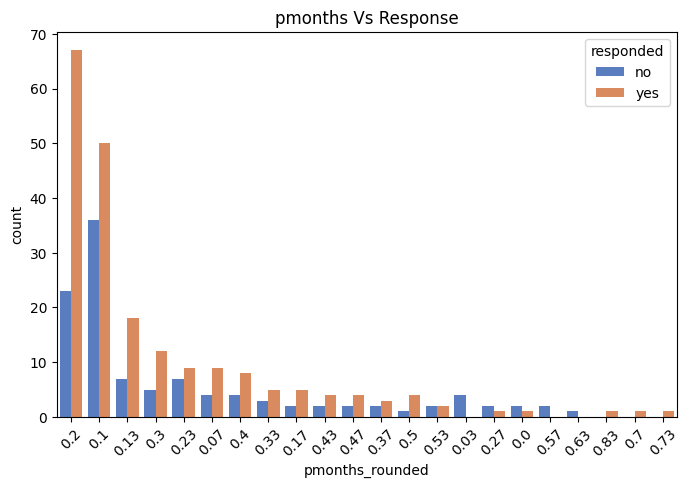

In [32]:
# Plot a countplot for the 'pmonths' column.
plt.figure(figsize=(8,5))
temp_df = train_df.copy()
# Round the values in the 'pmonths' column to 2 decimals
temp_df['pmonths_rounded'] = temp_df['pmonths'].round(2)
sns.countplot(x='pmonths_rounded',hue = 'responded',data = temp_df,palette='muted',order=temp_df['pmonths_rounded'].value_counts().index)
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize=(8,5))
temp_df = train_df[train_df['pmonths']!=999]
# Round the values in the 'pmonths' column to 2 decimals
temp_df['pmonths_rounded'] = temp_df['pmonths'].round(2)
sns.countplot(x='pmonths_rounded',hue = 'responded',data = temp_df,palette='muted',order=temp_df['pmonths_rounded'].value_counts().index)
plt.xticks(rotation = 45)
# Save the plot as PNG file
plt.savefig('pmonths.png')
plt.title('pmonths Vs Response')
plt.show()

After ignoring the customers who were not previously contacted,there are more number of positive responses
when the customer is contacted around .2 months from the previous campaign.

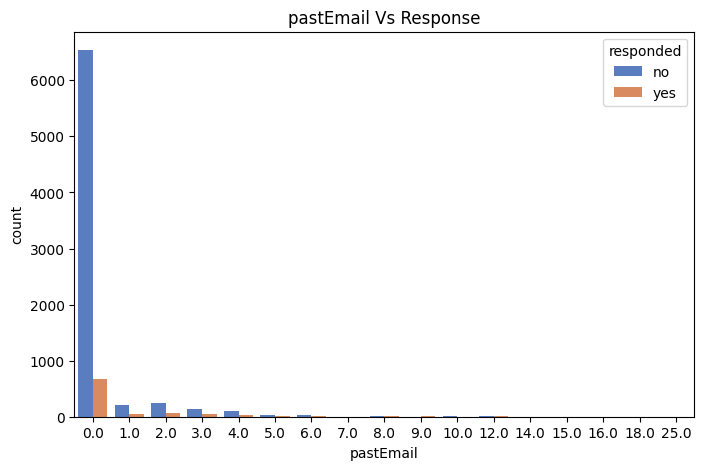

In [33]:
# Plot a countplot for the 'pastEmail' column.
plt.figure(figsize=(8,5))
sns.countplot(data = train_df,x= 'pastEmail',hue='responded',palette ='muted')
# Save the plot as PNG file
plt.savefig('pastEmail.png')
plt.title('pastEmail Vs Response')
plt.show()

Inspite of the increase in the number of previous email sent to customer,the positive responses from the customer decreases.

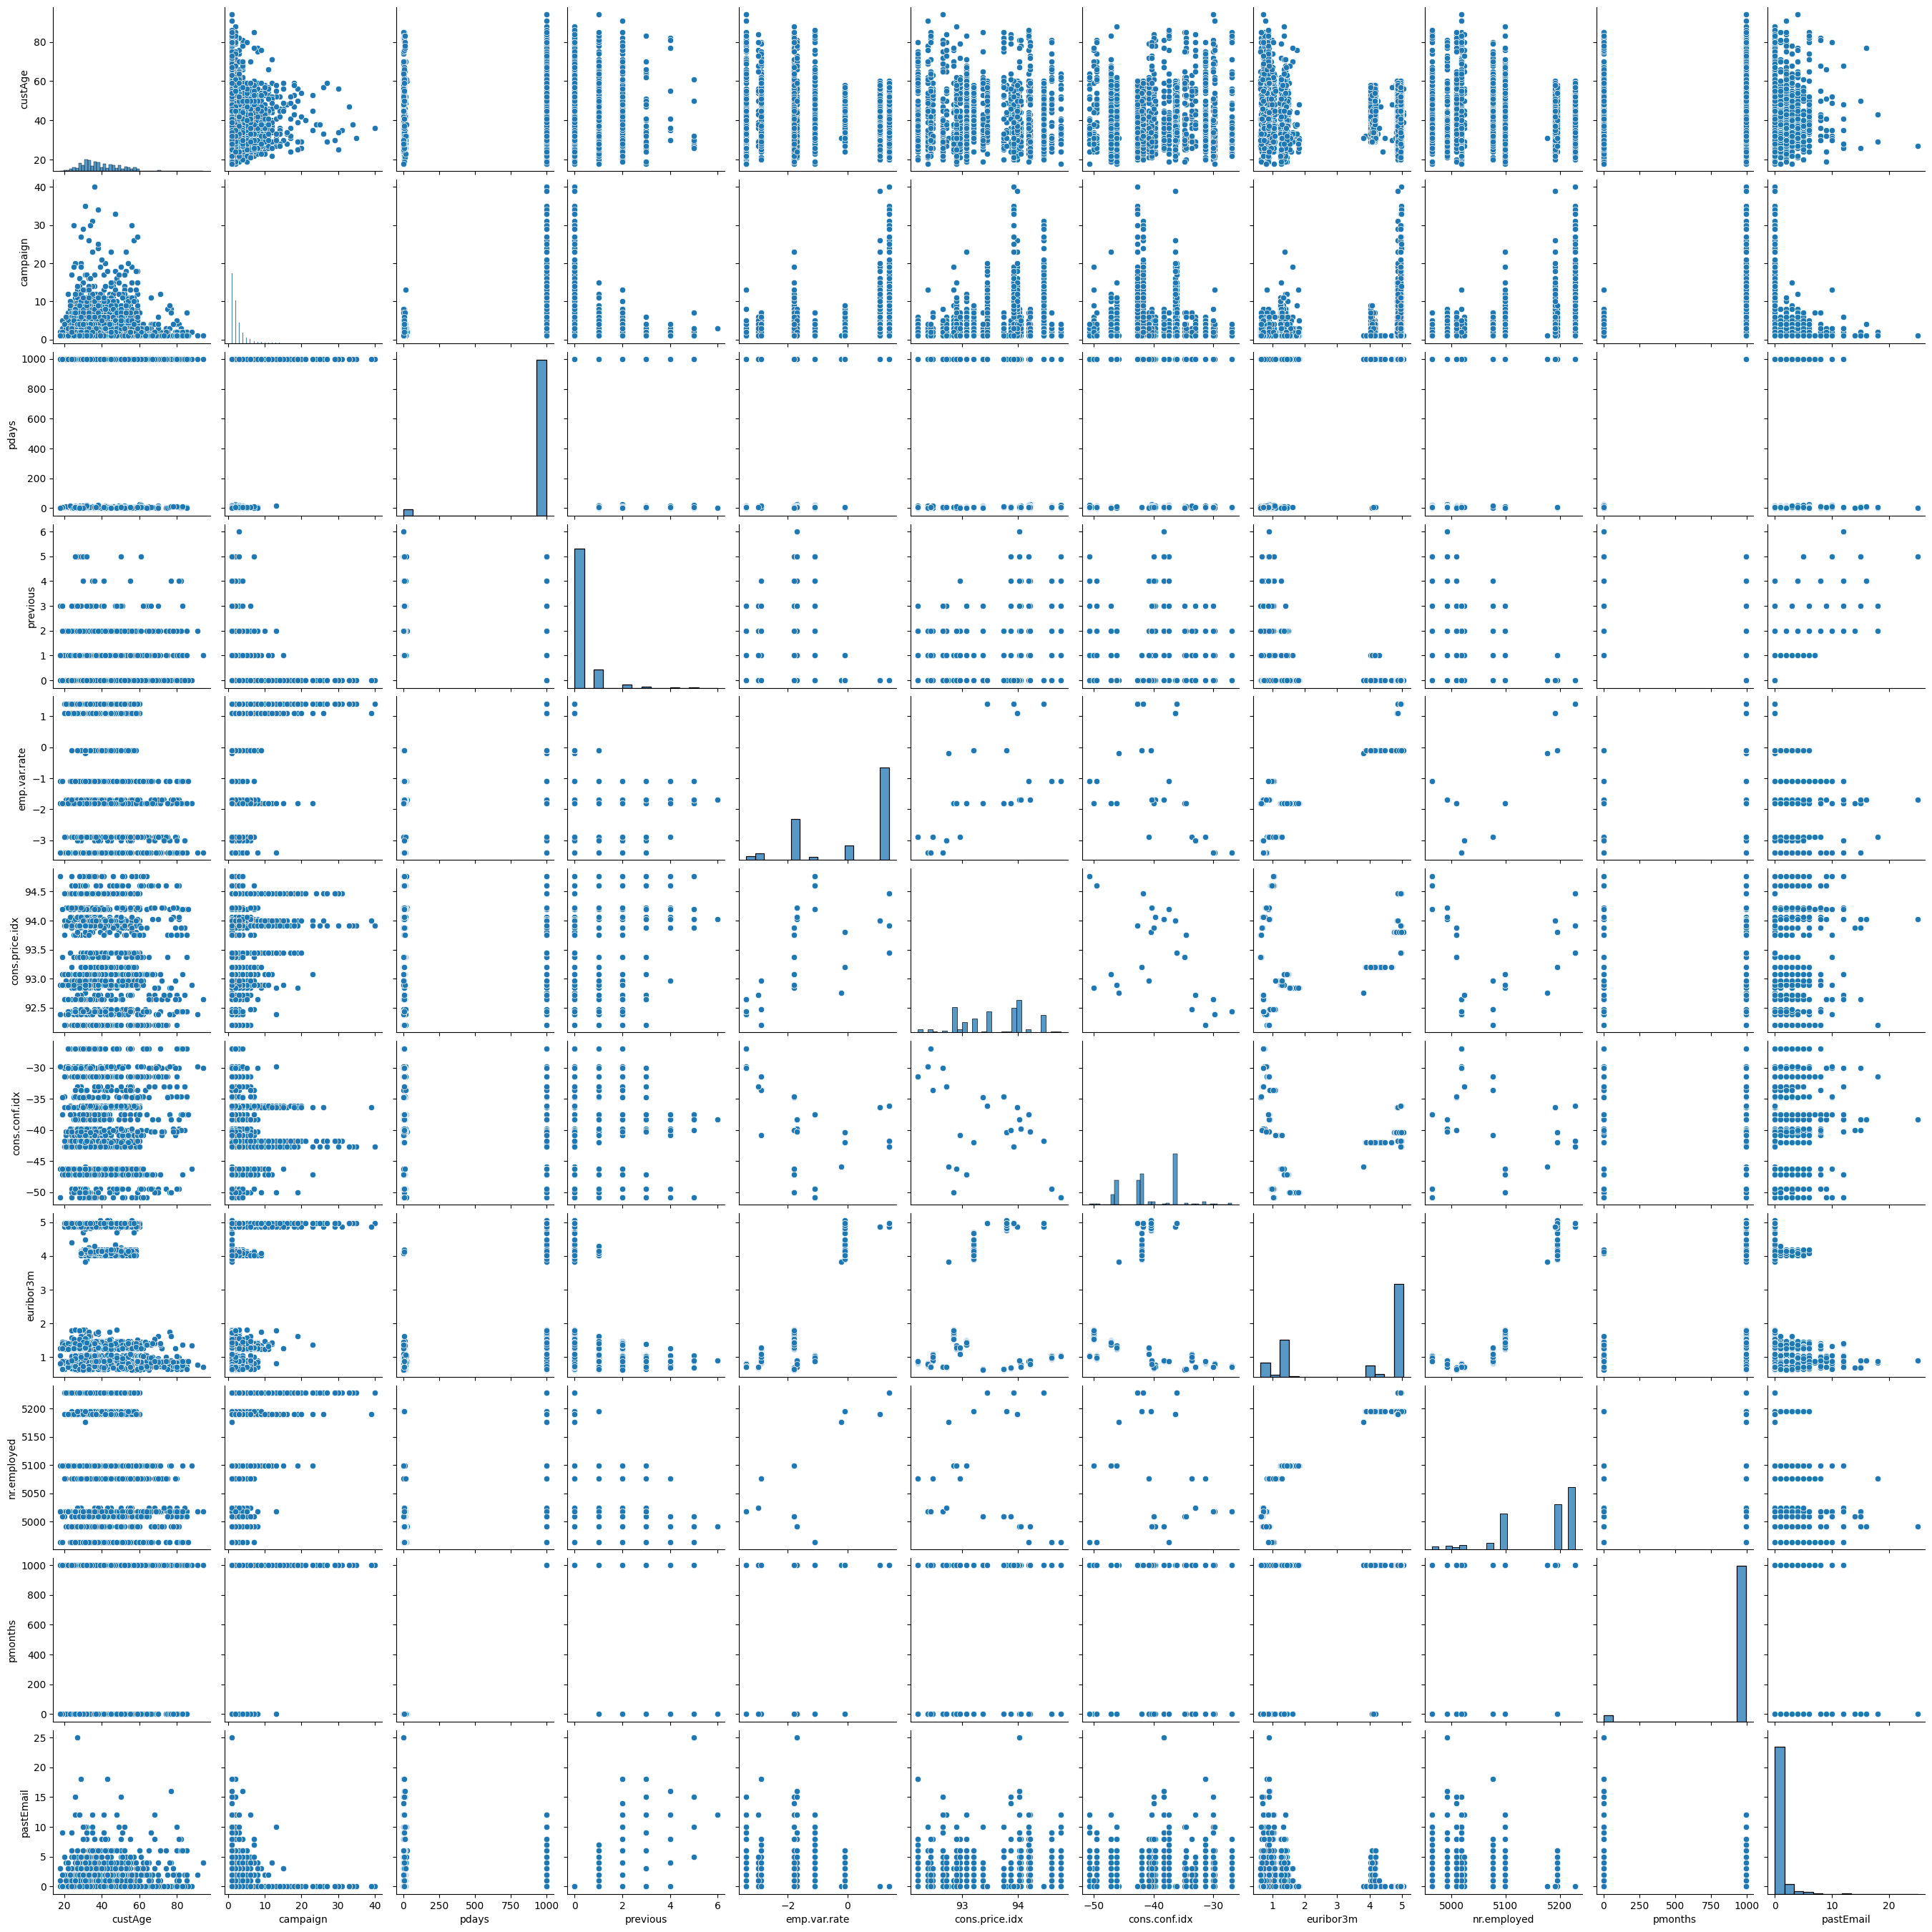

In [34]:
sns.pairplot(train_df)

There is no significant inference obtained from the above pairplots between the features in the dataset.

### Null value Treatment 

In [35]:
train_df.isnull().sum()/len(train_df)*100

custAge           24.447681
profession         0.000000
marital            0.000000
schooling         29.206118
default            0.000000
housing            0.000000
loan               0.000000
contact            0.000000
month              0.000000
day_of_week        9.553290
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
pmonths            0.000000
pastEmail          0.000000
responded          0.000000
dtype: float64

There are null values in 'custAge','schooling' and 'day_of_week' features.

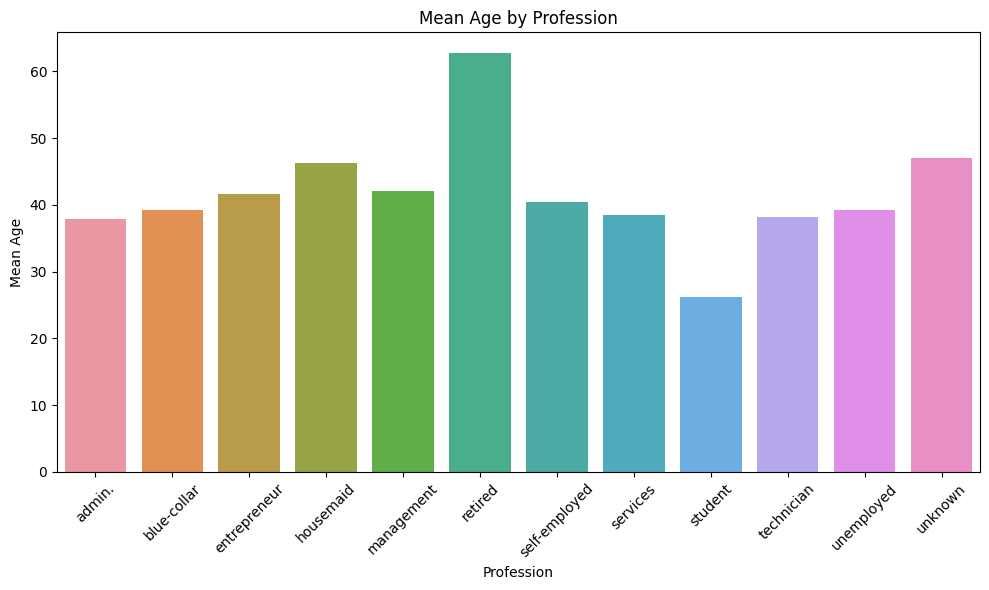

In [36]:
#impute the missing values in age feature based on the profession done by the customers
#Calculate mean age for each profession
mean_age_by_profession = train_df.groupby('profession')['custAge'].mean()
# Plot median age for each profession
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_age_by_profession.index, y=mean_age_by_profession.values)
plt.xlabel('Profession')
plt.ylabel('Mean Age')
plt.title('Mean Age by Profession')
plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot as PNG file
plt.savefig('Mean_Age_by_Profession.png')
plt.show()


In [37]:
# Impute null values in 'custAge' based on mean age for each profession
for profession,mean_age in mean_age_by_profession.items():
    train_df.loc[(train_df['profession'] == profession) & (train_df['custAge'].isnull()), 'custAge'] = mean_age

In [38]:
#Mode imputation for categorical column 'day_of_week'
missing_cat_column = ['day_of_week']
mode_imputer = SimpleImputer(strategy='most_frequent')
train_df[missing_cat_column] = mode_imputer.fit_transform(train_df[missing_cat_column])

In [39]:
# Impute null values in 'schooling' based on the customer profession
schooling_by_profession = train_df.groupby('profession')['schooling'].agg(lambda x: x.mode())
# Print the result
print(schooling_by_profession)

profession
admin.             university.degree
blue-collar                 basic.9y
entrepreneur       university.degree
housemaid                   basic.4y
management         university.degree
retired                     basic.4y
self-employed      university.degree
services                 high.school
student                  high.school
technician       professional.course
unemployed               high.school
unknown                      unknown
Name: schooling, dtype: object


As education level and profession are highly correlated with each other,found the most common schooling 
for the particular profession.

In [40]:
#Impute null values in 'schooling' column with mode value based on 'profession'.
for profession, mode_value in schooling_by_profession.items():
    train_df.loc[(train_df['profession'] == profession) & (train_df['schooling'].isnull()), 'schooling'] = mode_value

In [41]:
#recheck for null values in the dataset after imputations
train_df.isnull().sum()/len(train_df)*100

custAge           0.0
profession        0.0
marital           0.0
schooling         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
pmonths           0.0
pastEmail         0.0
responded         0.0
dtype: float64

Thus all the null values are successfully imputed.

### Remove Duplicates

In [42]:
#checking for duplicates
num_duplicates = train_df.duplicated().sum()
num_duplicates

64

In [43]:
#Removing the duplicate records
train_df.drop_duplicates(inplace=True)
#Shape of the dataset after removing the duplicates
train_df.shape

(8174, 22)

### Feature Engineering

In [44]:
#Making a copy for the training dataset as we do not want change the original dataset.
new_train_df = train_df.copy()

In [45]:
#Encoding the target variable for class 0 and class 1
new_train_df['responded'] = new_train_df['responded'].map(lambda x: 0 if x == 'no' else 1)

### Correlation Matrix

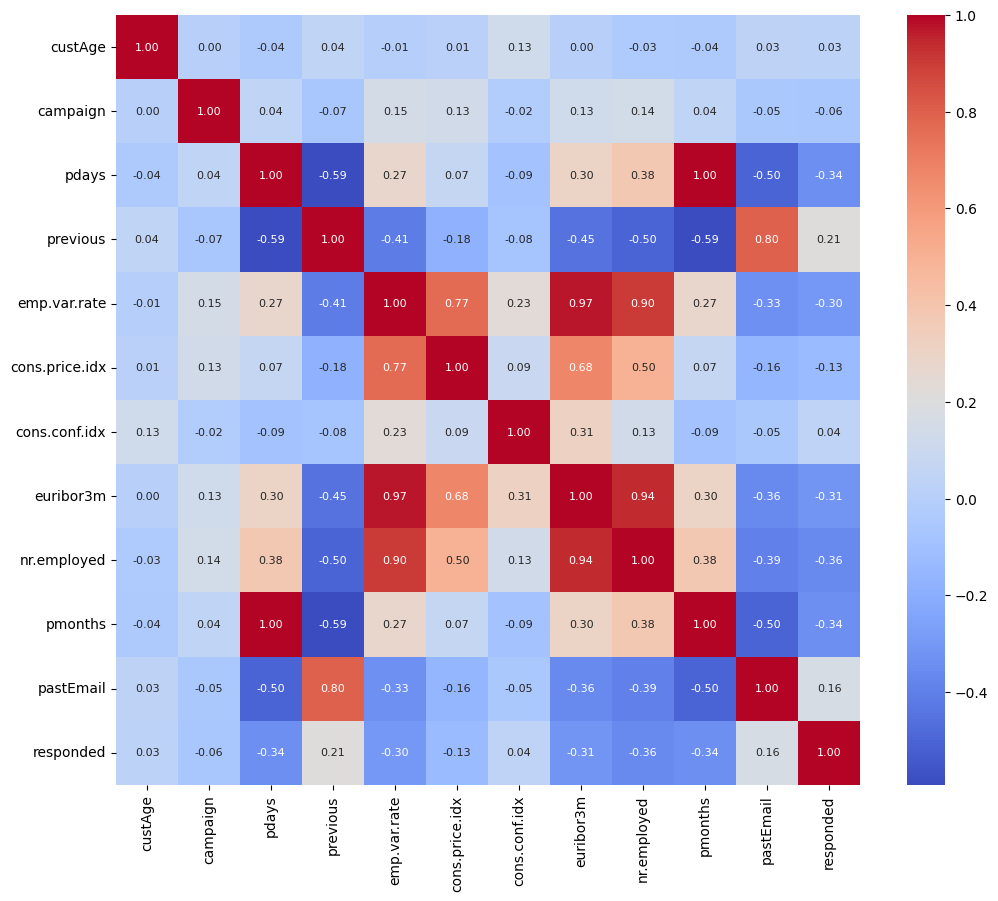

In [46]:
# Find the correlation between the numerical features
plt.figure(figsize=(12,10))
cols = ['custAge', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
        'euribor3m', 'nr.employed', 'pmonths', 'pastEmail','responded']
cor = new_train_df[cols].corr()
sns.heatmap(cor, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size":8})
# Save the plot as PNG file
plt.savefig('correlation_matrix.png')
plt.show()

From the above correlation matrix,features like employment rate,number of employees,euribor 3 month rate are highly correlated with the target variable 'responded'.The feature 'pmonths' is highly correlated with the 'pdays' feature.So further analysis are done on both the features below.

In [47]:
#check for correlation between the features with the target variable
source_corr = cor[['responded']].sort_values(by='responded',ascending=True)
source_corr

,responded
nr.employed,-0.358632
pmonths,-0.338311
pdays,-0.338257
euribor3m,-0.313982
emp.var.rate,-0.302553
cons.price.idx,-0.133232
campaign,-0.062545
custAge,0.028555
cons.conf.idx,0.037616
pastEmail,0.164044


In [48]:
freq_pdays = new_train_df['pdays'].value_counts()
print(freq_pdays)
freq_pmonths = new_train_df['pmonths'].value_counts()
print(freq_pmonths)

pdays
999.0    7858
6.0        90
3.0        86
4.0        25
9.0        17
7.0        16
2.0        13
12.0       12
10.0        8
5.0         7
13.0        6
14.0        6
15.0        5
11.0        5
16.0        4
1.0         4
0.0         3
8.0         3
17.0        2
19.0        1
25.0        1
21.0        1
22.0        1
Name: count, dtype: int64
pmonths
999.000000    7858
0.200000        90
0.100000        86
0.133333        25
0.300000        17
0.233333        16
0.066667        13
0.400000        12
0.333333         8
0.166667         7
0.433333         6
0.466667         6
0.500000         5
0.366667         5
0.533333         4
0.033333         4
0.000000         3
0.266667         3
0.566667         2
0.633333         1
0.833333         1
0.700000         1
0.733333         1
Name: count, dtype: int64


From the above data we can understand that 'pmonths' essentially represents the duration indicated by 'pdays' in terms of months. For instance, if 'pdays' equals 6, then 'pmonths' equals 6/30, which equals 0.2. As both features convey the same temporal information,dropping the 'pmonths' column.

In [49]:
new_train_df.drop('pmonths',axis=1,inplace=True)

#labelling the pdays feature
conditions_pdays = [
        (new_train_df['pdays'] == 999),
        (new_train_df['pdays'] < 5),
        ((new_train_df['pdays'] >= 5) & (new_train_df['pdays'] <= 10)),
        ((new_train_df['pdays'] > 10) & (new_train_df['pdays'] != 999)) ]

choices_pdays = ['not_contacted', 'less_than_5_days', '5_to_10 days', 'greater_than_10_days']

# Create the 'pdays' column based on conditions
new_train_df['pdays'] = np.select(conditions_pdays, choices_pdays, default='unknown')
new_train_df['pdays'].value_counts()

pdays
not_contacted           7858
5_to_10 days             141
less_than_5_days         131
greater_than_10_days      44
Name: count, dtype: int64

In [50]:
#Labelling the feature 'pastEmail' according to the values present in it.
sorted_unique_values = np.sort(new_train_df['pastEmail'].unique())
# Define conditions and choices for pastEmail
conditions_pastEmail = [
        (new_train_df['pastEmail'] == 0),
        (new_train_df['pastEmail'] < 10),
        (new_train_df['pastEmail'] >= 10) ]

choices_pastEmail = ['no_email_sent', 'less_than_10', 'more_than_10']

# Create the 'pastEmail_category' column based on conditions
new_train_df['pastEmail'] = np.select(conditions_pastEmail, choices_pastEmail, default='unknown')
new_train_df['pastEmail'].value_counts()

pastEmail
no_email_sent    7156
less_than_10      990
more_than_10       28
Name: count, dtype: int64

In [51]:
#Labelling the feature 'custAge' according to the values present in it.
sorted_unique_values = np.sort(new_train_df['custAge'].unique())
# Define conditions and choices for custAge
conditions_custAge = [
         (new_train_df['custAge'] <= 30),
         ((new_train_df['custAge'] > 30) & (new_train_df['custAge'] <= 45)),
         ((new_train_df['custAge'] > 45) & (new_train_df['custAge'] <= 60)),
         ((new_train_df['custAge'] > 60) & (new_train_df['custAge'] <= 75)),
         (new_train_df['custAge'] > 75) ]


choices_custAge = ['below_30', '30-45', '45-60','60-75','above_75']

# Create the 'pastEmail_category' column based on conditions
new_train_df['custAge'] = np.select(conditions_custAge, choices_custAge, default='unknown')
new_train_df['custAge'].value_counts()

custAge
30-45       5078
45-60       1681
below_30    1183
60-75        181
above_75      51
Name: count, dtype: int64

### Visualisation after Feature engineering

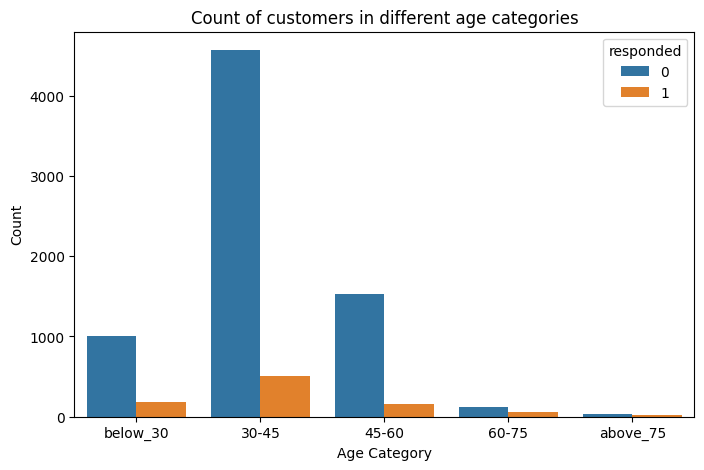

In [52]:
# Create a count plot for 'custAge' categories
plt.figure(figsize=(8,5))
sns.countplot(data=new_train_df, x='custAge',hue='responded', order=choices_custAge)
plt.title('Count of customers in different age categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
# Save the plot as PNG file
plt.savefig('Age_categories.png')
plt.show()

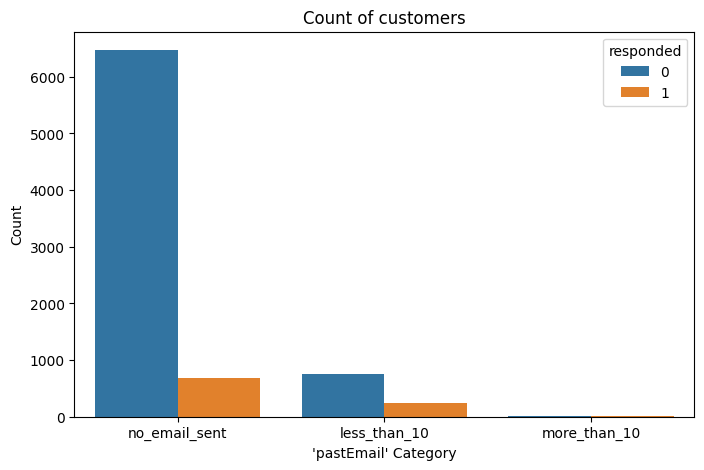

In [53]:
# Create a count plot for 'pastEmail' categories
plt.figure(figsize=(8,5))
sns.countplot(data=new_train_df, x='pastEmail',hue='responded', order=choices_pastEmail)
plt.title('Count of customers')
plt.xlabel("'pastEmail' Category")
plt.ylabel('Count')
# Save the plot as PNG file
plt.savefig('pastEmail_categories.png')
plt.show()

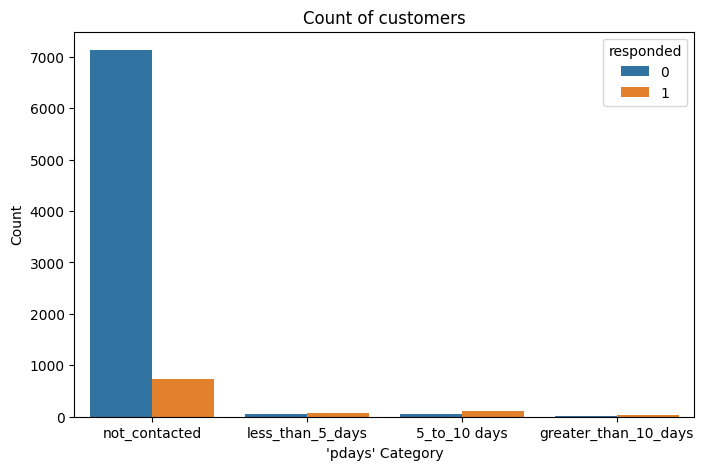

In [54]:
# Create a count plot for 'pdays' categories
plt.figure(figsize=(8,5))
sns.countplot(data=new_train_df, x='pdays',hue='responded', order=choices_pdays)
plt.title('Count of customers')
plt.xlabel("'pdays' Category")
plt.ylabel('Count')
# Save the plot as PNG file
plt.savefig('pdays_categories.png')
plt.show()

### Identifying numerical,categorical and binary features

In [55]:
#Finding the numerical features in the dataset
numerical_columns = new_train_df._get_numeric_data().columns

In [56]:
#Find the categorical features in the dataset
categorical_columns = new_train_df.drop(numerical_columns,axis=1).columns

In [57]:
#identify the binary columns
def binary_columns(dataset):
    binary_cols = []
    for i in dataset.select_dtypes(include=['int', 'float']).columns:
        unique_values = dataset[i].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(i)
    return binary_cols

binary_cols = binary_columns(new_train_df)
numerical_columns = [i for i in numerical_columns if i not in binary_cols]

In [58]:
print(numerical_columns)
print(categorical_columns)
print(binary_cols)  

['campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'pdays', 'poutcome',
       'pastEmail'],
      dtype='object')
['responded']


# Outliers Plot

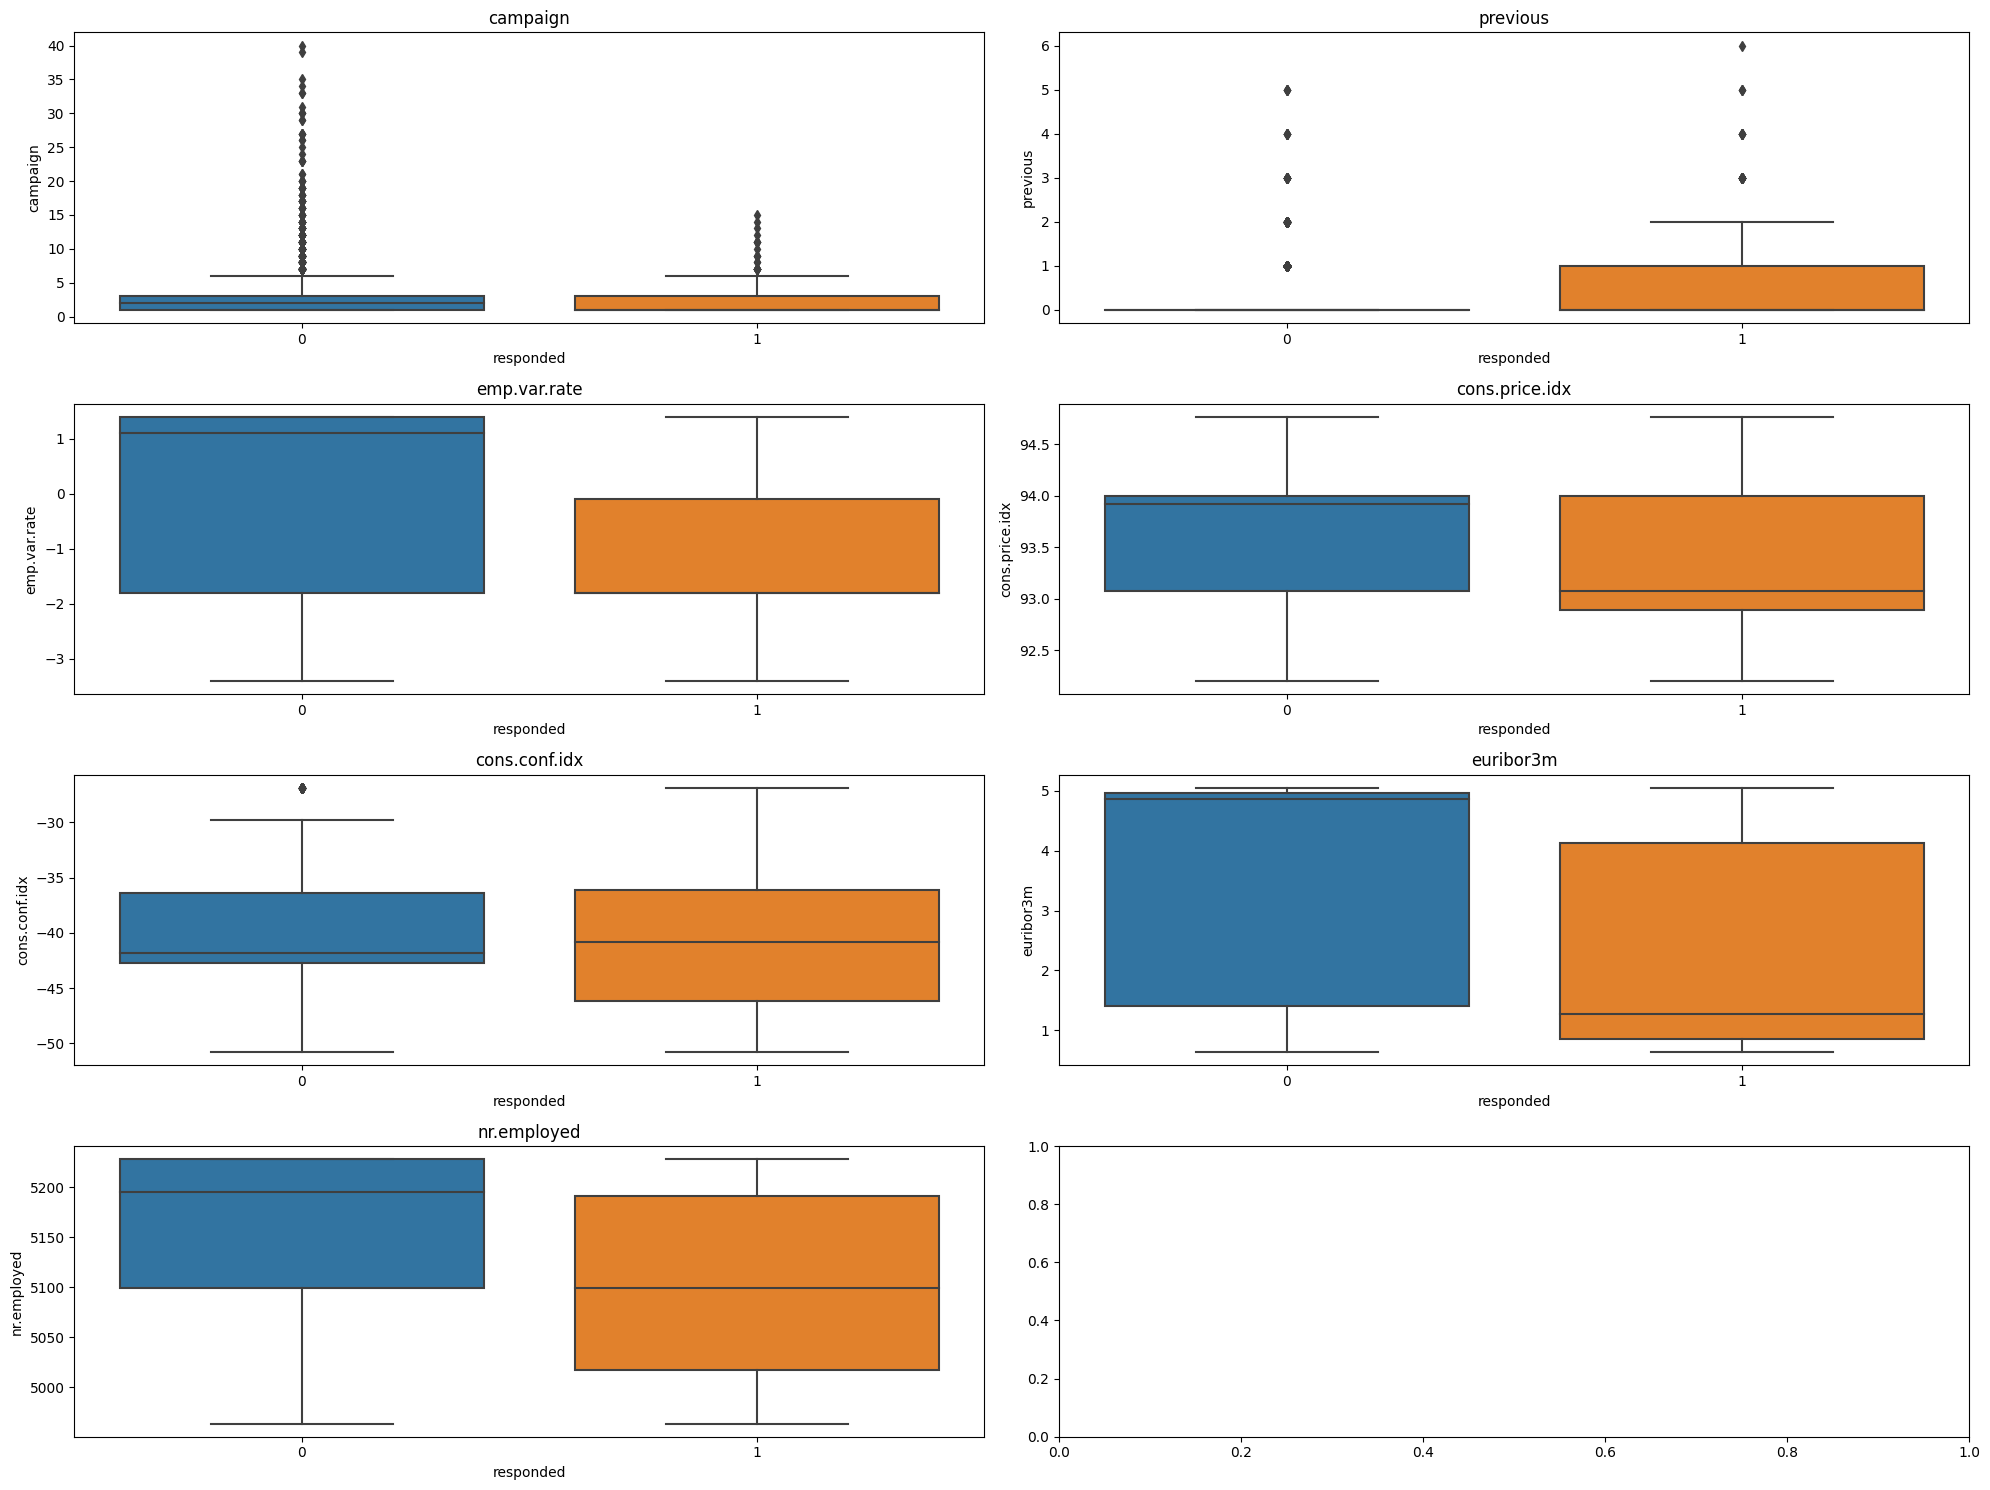

In [59]:
#boxplot for the numerical features

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
    
# Iterate through each column and create a box plot
# Use two indices to access the correct subplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=new_train_df,x = 'responded',y=col, ax=axes[i//2, i%2])  
    axes[i//2, i%2].set_title(col)
        
plt.tight_layout()
plt.show()

From the above boxplots,we could find outliers present in the features 'campaign'.

#### Skewness of the features

In [60]:
#find the skewness of the numerical features
skewness = train_df[numerical_columns].skew()
print(skewness)

campaign          4.812034
previous          3.822065
emp.var.rate     -0.668240
cons.price.idx   -0.184092
cons.conf.idx     0.296747
euribor3m        -0.654088
nr.employed      -1.012087
dtype: float64


In [61]:
# Find columns with positive skewness
positive_skew_cols = skewness[skewness > 1].index.tolist()
print(positive_skew_cols)
    
# Apply log transformation to columns with positive skewness
for col in positive_skew_cols:
    new_train_df[col] = np.log1p(new_train_df[col])


['campaign', 'previous']


In [62]:
for i in numerical_columns:
    print(f'The skewness of the feature {i}: {new_train_df[i].skew()}')

The skewness of the feature campaign: 1.3550847784885267
The skewness of the feature previous: 2.5138501456316944
The skewness of the feature emp.var.rate: -0.6682396652752055
The skewness of the feature cons.price.idx: -0.18409162539049945
The skewness of the feature cons.conf.idx: 0.29674659225392386
The skewness of the feature euribor3m: -0.6540881670870189
The skewness of the feature nr.employed: -1.0120868801209453


# Feature Scaling and encoding

In [63]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
#specify the features that needs to be label encoded
cat_cols1 = ['profession','schooling', 'month', 'day_of_week']
for col in cat_cols1:
    new_train_df[col] = label_encoder.fit_transform(new_train_df[col])
    
#specify the features that needs to be one hot encoded        
cat_cols2 = ['custAge','marital', 'default', 'housing', 'loan','contact', 'poutcome','pdays','pastEmail']
# Use pd.get_dummies() to one-hot encode the categorical columns
encoded_features = pd.get_dummies(new_train_df[cat_cols2])
# Concatenate the original DataFrame with the encoded features along the columns axis
new_train_df = pd.concat([new_train_df, encoded_features], axis=1)
# Drop the original categorical columns if needed
new_train_df.drop(cat_cols2, axis=1, inplace=True) 

In [64]:
#Scale the numerical columns of the DataFrame using StandardScaler.
def feature_scaling(new_train_df, numerical_columns):
# Initialize the StandardScaler
    sc_x = StandardScaler()
    new_train_df[numerical_columns] = sc_x.fit_transform(new_train_df[numerical_columns])
    return new_train_df

final_train_df = feature_scaling(new_train_df, numerical_columns)

In [65]:
#print the final encoded and scaled train dataset
final_train_df.head()

,profession,schooling,month,day_of_week,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,poutcome_failure,poutcome_nonexistent,poutcome_success,pdays_5_to_10 days,pdays_greater_than_10_days,pdays_less_than_5_days,pdays_not_contacted,pastEmail_less_than_10,pastEmail_more_than_10,pastEmail_no_email_sent
0,0,6,0,4,-0.033623,-0.392472,-1.179916,-0.855019,-1.399155,-1.193438,...,False,True,False,False,False,False,True,False,False,True
1,7,3,3,2,5.080527,-0.392472,0.860548,0.599221,-0.454155,0.795335,...,False,True,False,False,False,False,True,False,False,True
2,0,3,4,1,-0.868104,-0.392472,0.860548,1.542838,-0.260859,0.791323,...,False,True,False,False,False,False,True,False,False,True
3,0,6,3,3,-0.033623,-0.392472,0.860548,0.599221,-0.454155,0.791896,...,False,True,False,False,False,False,True,False,False,True
4,1,2,3,3,1.710189,-0.392472,0.860548,0.599221,-0.454155,0.791323,...,False,True,False,False,False,False,True,False,False,True


### Selection of Models

In [66]:
#Define the classifiers
classifiers ={'Logistic_Regression':LogisticRegression(),
              'K_Neighbors':KNeighborsClassifier(),
              'Support Vector Classifier': SVC(),
              'RandomForest_Classifier':RandomForestClassifier(n_jobs=-1),
              'Gradient_Boosting':GradientBoostingClassifier()
               }

### Splitting data

In [67]:
#Split the dataset into features and target
X_original = final_train_df.drop('responded',axis= 1)
y_original = final_train_df['responded']

In [68]:
X_train_original,X_test_original,y_train_original,y_test_original = train_test_split \
                                (X_original,y_original,test_size=0.2,random_state=42,stratify=y_original)

In [69]:
print(X_train_original.shape)
print(X_test_original.shape)
print(y_train_original.shape)
print(y_test_original.shape)

(6539, 41)
(1635, 41)
(6539,)
(1635,)


In [70]:
#Create an empty dataframe to store scores for various algorithms
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,roc_auc_score

score_card = pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','ROC_AUC_score','f1-score'])
score_card1 = pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','ROC_AUC_score','f1-score'])
#update the result table for all the scores
#Performance measure considered for model comparison are AUC score,Precision,Recall,Accuracy,F1-score.
#compile the required information in a user defined function
def update_score_card(model,accuracy,recall,precision,AUC_score,f1):
    global score_card
    new_score_card = pd.DataFrame({'Model':model,'Accuracy':[accuracy],
                                  'Recall':[recall],'Precision':[precision],
                                  'ROC_AUC_score':[AUC_score],'f1-score':[f1]})
    #append the results to the dataframe
    score_card = pd.concat([score_card,new_score_card],ignore_index=True)
    
def update_score_card1(model,accuracy,recall,precision,AUC_score,f1):
    global score_card1
    new_score_card1 = pd.DataFrame({'Model':model,'Accuracy':[accuracy],
                                  'Recall':[recall],'Precision':[precision],
                                  'ROC_AUC_score':[AUC_score],'f1-score':[f1]})
    #append the results to the dataframe
    score_card1 = pd.concat([score_card1,new_score_card1],ignore_index=True)
    

### Cross-validation  of  different Classifiers for original dataset without resampling

In [71]:
# Define the number of folds for cross-validation
n_folds = 5  # Or any other desired value

for key, clf in classifiers.items():
    # Perform stratified cross-validation
    cv_scores = cross_val_score(clf, X_train_original,y_train_original, cv=StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=24))
    average_accuracy = np.mean(cv_scores)
    
    # Perform stratified cross-validation for recall
    cv_scores_recall = cross_val_score(clf, X_train_original, y_train_original, cv=StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=24),scoring='recall')
    avg_recall = np.mean(cv_scores_recall)
    
    # Perform stratified cross-validation for precision
    cv_scores_precision = cross_val_score(clf, X_train_original, y_train_original, cv=StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=24), scoring='precision')
    avg_precision = np.mean(cv_scores_precision)
    
    # Perform stratified cross-validation for F1-score
    cv_scores_f1 = cross_val_score(clf, X_train_original, y_train_original, cv=StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=24), scoring='f1')
    avg_f1 = np.mean(cv_scores_f1)
    
    # Perform stratified cross-validation for ROC AUC
    cv_scores_roc_auc = cross_val_score(clf, X_train_original, y_train_original, cv=StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=24), scoring='roc_auc')
    avg_roc_auc = np.mean(cv_scores_roc_auc)
    
    key = key +'+ Original_dataset'
    update_score_card1(key,average_accuracy,avg_recall,avg_precision,avg_roc_auc,avg_f1)

score_card1




,Model,Accuracy,Recall,Precision,ROC_AUC_score,f1-score
0,Logistic_Regression+ Original_dataset,0.898608,0.215618,0.668527,0.780782,0.324572
1,K_Neighbors+ Original_dataset,0.885761,0.211582,0.490425,0.686036,0.293920
2,Support Vector Classifier+ Original_dataset,0.897537,0.190005,0.680654,0.699041,0.295641
3,RandomForest_Classifier+ Original_dataset,0.892797,0.278895,0.558867,0.751953,0.371740
4,Gradient_Boosting+ Original_dataset,0.897997,0.258670,0.620054,0.797000,0.364542


Although all the classfiers give better accuracy,since the data is highly imbalanced we need to introduce resampling before training the model.These models give poor Recall,Precision score as the model is trained on imbalanced dataset.

### Cross-validation and performance metrics of different Classifiers after SMOTE

In [72]:
# Perform cross-validation with SMOTE technique
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
smote = SMOTE()
# Loop through each classifier and evaluate its performance
for key, clf in classifiers.items():
    cv_accuracy = []  
    cv_recall = []  
    cv_roc_auc = []  
    cv_precision = [] 
    cv_f1 = []  
    
    for train_idx, test_idx in skf.split(X_train_original, y_train_original):
        x_train, y_train = smote.fit_resample(X_train_original.iloc[train_idx], y_train_original.iloc[train_idx])
        x_test, y_test = X_train_original.iloc[test_idx], y_train_original.iloc[test_idx]
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        
        # Compute accuracy
        accuracy = accuracy_score(y_test, y_pred)
        cv_accuracy.append(accuracy)
        # Compute recall
        recall = recall_score(y_test, y_pred)
        cv_recall.append(recall)
        # Compute precision
        precision = precision_score(y_test, y_pred)
        cv_precision.append(precision)
        # Compute ROC AUC
        roc_auc = roc_auc_score(y_test, y_pred)
        cv_roc_auc.append(roc_auc)
        # Compute F1-score
        f1 = f1_score(y_test, y_pred)
        cv_f1.append(f1)       
        
    
    # Calculate average accuracy and recall across folds
    avg_accuracy = np.mean(cv_accuracy)
    avg_recall = np.mean(cv_recall)
    avg_precision = np.mean(cv_precision)
    avg_roc_auc = np.mean(cv_roc_auc)
    avg_f1 = np.mean(cv_f1)
    key = key +'+ SMOTE'
    update_score_card(key,avg_accuracy,avg_recall,avg_precision,avg_roc_auc,avg_f1)
score_card

,Model,Accuracy,Recall,Precision,ROC_AUC_score,f1-score
0,Logistic_Regression+ SMOTE,0.884845,0.319463,0.494698,0.638342,0.386715
1,K_Neighbors+ SMOTE,0.804711,0.474406,0.284177,0.660697,0.355305
2,Support Vector Classifier+ SMOTE,0.879034,0.382723,0.462635,0.662641,0.418406
3,RandomForest_Classifier+ SMOTE,0.882703,0.350336,0.476665,0.650587,0.403556
4,Gradient_Boosting+ SMOTE,0.888974,0.367894,0.516658,0.661781,0.429276


After applying the SMOTE technique to balance the data, both precision and recall scores have shown significant improvement compared to the metrics obtained from the original dataset without resampling methods.

### Cross-validation and performance metrics of different Classifiers after Random Undersampler

In [73]:
# Perform cross-validation with random undersampling
undersampler = RandomUnderSampler()
# Loop through each classifier and evaluate its performance
for key, clf in classifiers.items():
    cv_accuracy = []  
    cv_recall = []  
    cv_roc_auc = []  
    cv_precision = [] 
    cv_f1 = []  
    
    for train_idx, test_idx in skf.split(X_train_original, y_train_original):
        x_train, y_train = undersampler.fit_resample(X_train_original.iloc[train_idx], y_train_original.iloc[train_idx])
        x_test, y_test = X_train_original.iloc[test_idx], y_train_original.iloc[test_idx]
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        
        # Compute accuracy
        accuracy = accuracy_score(y_test, y_pred)
        cv_accuracy.append(accuracy)
        # Compute recall
        recall = recall_score(y_test, y_pred)
        cv_recall.append(recall)
        # Compute precision
        precision = precision_score(y_test, y_pred)
        cv_precision.append(precision)
        # Compute ROC AUC
        roc_auc = roc_auc_score(y_test, y_pred)
        cv_roc_auc.append(roc_auc)
        # Compute F1-score
        f1 = f1_score(y_test, y_pred)
        cv_f1.append(f1)       
        
    
    # Calculate average accuracy and recall across folds
    avg_accuracy = np.mean(cv_accuracy)
    avg_recall = np.mean(cv_recall)
    avg_precision = np.mean(cv_precision)
    avg_roc_auc = np.mean(cv_roc_auc)
    avg_f1 = np.mean(cv_f1)
    key = key +'+ Undersampler'
    update_score_card(key,avg_accuracy,avg_recall,avg_precision,avg_roc_auc,avg_f1)
score_card

,Model,Accuracy,Recall,Precision,ROC_AUC_score,f1-score
0,Logistic_Regression+ SMOTE,0.884845,0.319463,0.494698,0.638342,0.386715
1,K_Neighbors+ SMOTE,0.804711,0.474406,0.284177,0.660697,0.355305
2,Support Vector Classifier+ SMOTE,0.879034,0.382723,0.462635,0.662641,0.418406
3,RandomForest_Classifier+ SMOTE,0.882703,0.350336,0.476665,0.650587,0.403556
4,Gradient_Boosting+ SMOTE,0.888974,0.367894,0.516658,0.661781,0.429276
5,Logistic_Regression+ Undersampler,0.794925,0.650925,0.309290,0.732141,0.419056
6,K_Neighbors+ Undersampler,0.698728,0.648213,0.220268,0.676703,0.328534
7,Support Vector Classifier+ Undersampler,0.760978,0.668484,0.275972,0.720654,0.389805
8,RandomForest_Classifier+ Undersampler,0.764798,0.634736,0.271709,0.708089,0.380151
9,Gradient_Boosting+ Undersampler,0.796303,0.648231,0.311269,0.731740,0.420055


After employing the Undersampling technique to balance the data, while recall scores have demonstrated considerable enhancement, the accuracy and precision has experienced a notable decline, falling below the threshold of 0.85, which serves as the success metric.

### Cross-validation and performance metrics of different Classifiers after Random Oversampler

In [74]:
# Perform cross-validation with random oversampling
oversampler = RandomOverSampler()
# Loop through each classifier and evaluate its performance
for key, clf in classifiers.items():
    cv_accuracy = []  
    cv_recall = []  
    cv_roc_auc = []  
    cv_precision = [] 
    cv_f1 = []  
    
    for train_idx, test_idx in skf.split(X_train_original, y_train_original):
        x_train, y_train = oversampler.fit_resample(X_train_original.iloc[train_idx], y_train_original.iloc[train_idx])
        x_test, y_test = X_train_original.iloc[test_idx], y_train_original.iloc[test_idx]
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        
        # Compute accuracy
        accuracy = accuracy_score(y_test, y_pred)
        cv_accuracy.append(accuracy)
        # Compute recall
        recall = recall_score(y_test, y_pred)
        cv_recall.append(recall)
        # Compute precision
        precision = precision_score(y_test, y_pred)
        cv_precision.append(precision)
        # Compute ROC AUC
        roc_auc = roc_auc_score(y_test, y_pred)
        cv_roc_auc.append(roc_auc)
        # Compute F1-score
        f1 = f1_score(y_test, y_pred)
        cv_f1.append(f1)       
        
    
    # Calculate average accuracy and recall across folds
    avg_accuracy = np.mean(cv_accuracy)
    avg_recall = np.mean(cv_recall)
    avg_precision = np.mean(cv_precision)
    avg_roc_auc = np.mean(cv_roc_auc)
    avg_f1 = np.mean(cv_f1)
    key = key +'+ Oversampler'
    update_score_card(key,avg_accuracy,avg_recall,avg_precision,avg_roc_auc,avg_f1)


In [75]:
score_card.style.highlight_max(color = 'pink', axis = 0)

,Model,Accuracy,Recall,Precision,ROC_AUC_score,f1-score
0,Logistic_Regression+ SMOTE,0.884845,0.319463,0.494698,0.638342,0.386715
1,K_Neighbors+ SMOTE,0.804711,0.474406,0.284177,0.660697,0.355305
2,Support Vector Classifier+ SMOTE,0.879034,0.382723,0.462635,0.662641,0.418406
3,RandomForest_Classifier+ SMOTE,0.882703,0.350336,0.476665,0.650587,0.403556
4,Gradient_Boosting+ SMOTE,0.888974,0.367894,0.516658,0.661781,0.429276
5,Logistic_Regression+ Undersampler,0.794925,0.650925,0.309290,0.732141,0.419056
6,K_Neighbors+ Undersampler,0.698728,0.648213,0.220268,0.676703,0.328534
7,Support Vector Classifier+ Undersampler,0.760978,0.668484,0.275972,0.720654,0.389805
8,RandomForest_Classifier+ Undersampler,0.764798,0.634736,0.271709,0.708089,0.380151
9,Gradient_Boosting+ Undersampler,0.796303,0.648231,0.311269,0.731740,0.420055


The results indicate that the Gradient Boosting model consistently achieves higher accuracy,Precision,ROC AUC and F1 scores. Considering the highly imbalanced dataset,opted to proceed with the Gradient Boosting+SMOTE for further analysis and model refinement,as its accuracy is > 0.85 which serves as a success metric.

### Hyperparameter Tuning

In [76]:
smote = SMOTE(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
pipeline = Pipeline([('smote', smote), ('gb_classifier', gb_classifier)])

# Define the parameter grid to search
parameters = {
    'gb_classifier__n_estimators': [100, 200, 300],
    'gb_classifier__learning_rate': [0.01, 0.1, 0.2],
    'gb_classifier__max_depth': [3, 5, 7]
}


grid_search = GridSearchCV(pipeline, 
                           param_grid = parameters, 
                           cv=skf, 
                           scoring='f1', 
                           n_jobs=-1)
grid_search.fit(X_train_original, y_train_original)

best_est = grid_search.best_estimator_
best_model = grid_search.best_estimator_['gb_classifier']


print("Best parameters:", grid_search.best_params_)
print("Best f1 score:", grid_search.best_score_)
print("Best Model:",best_model)


Best parameters: {'gb_classifier__learning_rate': 0.01, 'gb_classifier__max_depth': 5, 'gb_classifier__n_estimators': 200}
Best f1 score: 0.46630055741562704
Best Model: GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=200,
                           random_state=42)


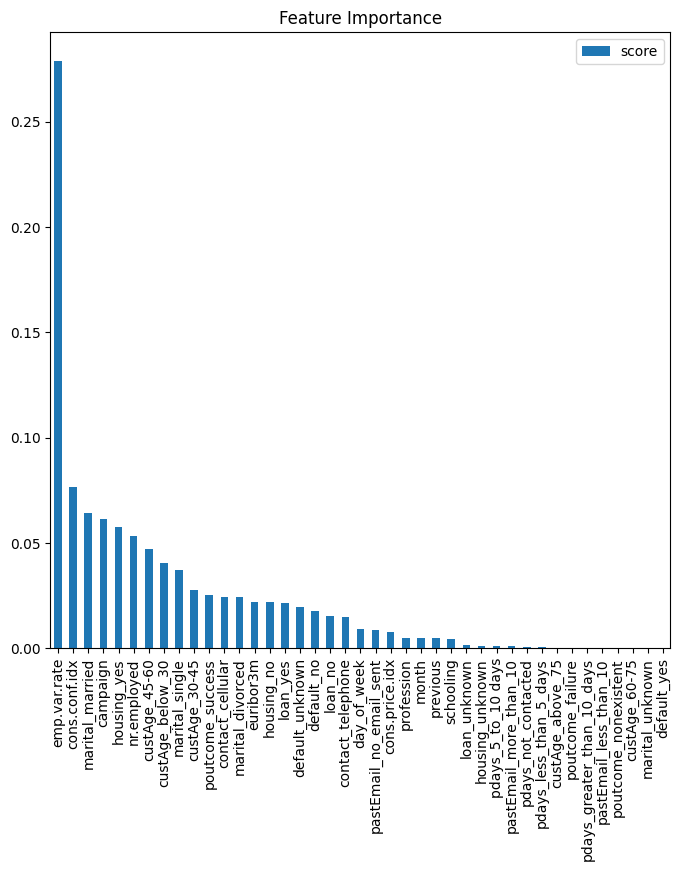

In [77]:
# Get feature importances
feature_importance = best_model.feature_importances_
features = X_test_original.columns
feature_importance_df = pd.DataFrame(data=feature_importance, index=features, columns=["score"]).sort_values(by = "score", ascending=False)
feature_importance_df.plot(kind = 'bar',figsize=(8,8))
plt.title('Feature Importance')
# Save the plot as PNG file
plt.savefig('Feature_importance.png')
plt.show()


In [78]:
#Predict for test data using the best model above
y_predictions = best_model.predict(X_test_original)
# Evaluate the gradient boosting model
accuracy = accuracy_score(y_test_original, y_predictions)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.869


Thus the accuracy > 0.85 is successfully achieved.

In [79]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Negative(0)","Positive(1)"]
# Classification Report
report = classification_report(y_test_original,y_predictions,target_names=target_names)
print(report)

              precision    recall  f1-score   support

 Negative(0)       0.93      0.92      0.93      1449
 Positive(1)       0.43      0.49      0.46       186

    accuracy                           0.87      1635
   macro avg       0.68      0.70      0.69      1635
weighted avg       0.88      0.87      0.87      1635



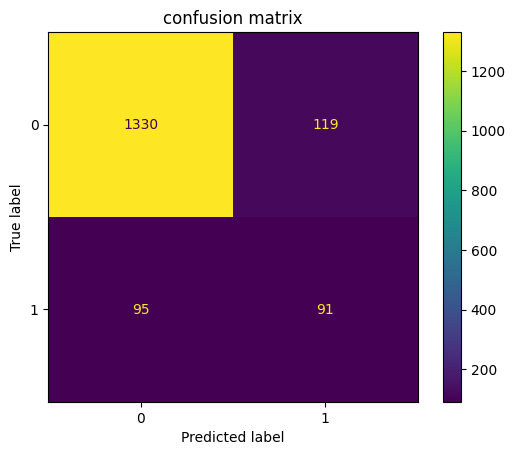

In [80]:
#checking the accuracy on the testing dataset using confusion matrix
cm = confusion_matrix(y_test_original,y_predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model.classes_)
display.plot()
# Save the plot as PNG file
plt.savefig('confusion_matrix.png')
plt.title('confusion matrix')
plt.show()

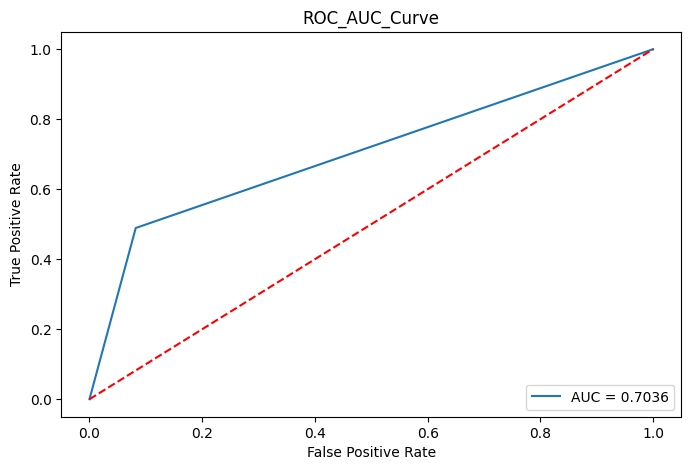

In [81]:
# Plot ROC curve
#Using ROC Curve we are checking the accuracy on the testing dataset
fpr, tpr, thresholds = roc_curve(y_test_original,y_predictions)
auc = round(roc_auc_score(y_test_original,y_predictions),4)
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label=f'AUC = {auc}')
# Add threshold line at 0.50
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
# Save the plot as PNG file
plt.savefig('ROC_AUC_Curve.png')
plt.title('ROC_AUC_Curve')
plt.show()

#### Conclusion:
The accuracy of 0.87(>.85), which is our success metric is achieved with gradient boosting algorithm along with SMOTE technique. Additionally, considering the highly imbalanced nature of the data, other metrics like recall, precision, and F1 score are crucial. These metrics have also shown significant improvements, enhancing our ability to effectively identify potential customers for marketing campaigns. 
#### Note: 
To proceed further for the end-to-end implementation of the project, please refer to the 'Marketing_source_code_pipeline.ipynb' notebook, where the target for the test dataset was identified using the optimal machine learning model.

In [82]:
#####################################################################################################################